In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip "/content/drive/MyDrive/CircuitGuard_Project/new PCB _ds.zip" -d /content/

Archive:  /content/drive/MyDrive/CircuitGuard_Project/new PCB _ds.zip
   creating: /content/new PCB _ds/
   creating: /content/new PCB _ds/images/
   creating: /content/new PCB _ds/images/Missing_hole/
  inflating: /content/new PCB _ds/images/Missing_hole/01_missing_hole_01.jpg  
  inflating: /content/new PCB _ds/images/Missing_hole/01_missing_hole_02.jpg  
  inflating: /content/new PCB _ds/images/Missing_hole/01_missing_hole_03.jpg  
  inflating: /content/new PCB _ds/images/Missing_hole/01_missing_hole_04.jpg  
  inflating: /content/new PCB _ds/images/Missing_hole/01_missing_hole_05.jpg  
  inflating: /content/new PCB _ds/images/Missing_hole/01_missing_hole_06.jpg  
  inflating: /content/new PCB _ds/images/Missing_hole/01_missing_hole_07.jpg  
  inflating: /content/new PCB _ds/images/Missing_hole/01_missing_hole_08.jpg  
  inflating: /content/new PCB _ds/images/Missing_hole/01_missing_hole_09.jpg  
  inflating: /content/new PCB _ds/images/Missing_hole/01_missing_hole_10.jpg  
  inflat

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def align_images(template_path, test_path):
    template_img = cv2.imread(template_path, cv2.IMREAD_GRAYSCALE)
    test_img = cv2.imread(test_path, cv2.IMREAD_GRAYSCALE)

    if template_img is None or test_img is None:
        return None

    orb = cv2.ORB_create(nfeatures=2000)
    keypoints1, descriptors1 = orb.detectAndCompute(template_img, None)
    keypoints2, descriptors2 = orb.detectAndCompute(test_img, None)
    matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = matcher.match(descriptors1, descriptors2)
    matches = sorted(matches, key=lambda x: x.distance)
    num_good_matches = int(len(matches) * 0.15)
    good_matches = matches[:num_good_matches]
    points1 = np.zeros((len(good_matches), 2), dtype=np.float32)
    points2 = np.zeros((len(good_matches), 2), dtype=np.float32)

    for i, match in enumerate(good_matches):
        points1[i, :] = keypoints1[match.queryIdx].pt
        points2[i, :] = keypoints2[match.trainIdx].pt

    h, mask = cv2.findHomography(points2, points1, cv2.RANSAC)
    height, width = template_img.shape
    aligned_img = cv2.warpPerspective(test_img, h, (width, height))
    return aligned_img

template_file = '/content/new PCB _ds/PCB_USED/01.JPG'
test_file = '/content/new PCB _ds/images/Missing_hole/01_missing_hole_20.jpg'

aligned_image = align_images(template_file, test_file)

if aligned_image is not None:
    print("......Subtracting images......")
    template_image = cv2.imread(template_file, cv2.IMREAD_GRAYSCALE)
    difference_map = cv2.absdiff(template_image, aligned_image)



......Subtracting images......


--------- Results --------


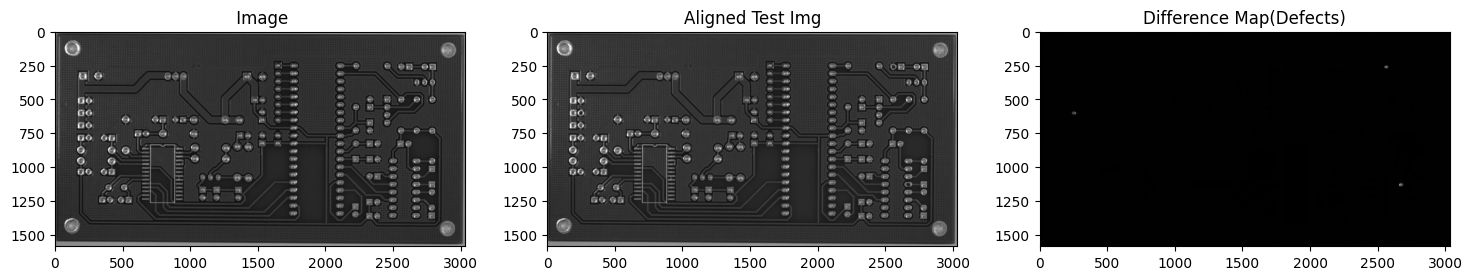

In [14]:
    print("--------- Results --------")
    plt.figure(figsize=(18, 6))

    plt.subplot(1, 3, 1)
    plt.title(" Image")
    plt.imshow(template_image, cmap='gray')

    plt.subplot(1, 3, 2)
    plt.title("Aligned Test Img")
    plt.imshow(aligned_image, cmap='gray')

    plt.subplot(1, 3, 3)
    plt.title("Difference Map(Defects)")
    plt.imshow(difference_map, cmap='gray')

    plt.show()